## Introduction:

- this is just an introduction to Tensorflow .. 
    it is mainly based on 3 elements:
    1. constant ==> needn't to be initialized 
    2. variable ==> have to be initialized
    3. placeholder ==> to feed the data from outside the model (lazem test5demlo feed_dict), you have to spesify its datatype
    
- This notebook is mainly for implementing (Linear regression and logistic regression) using tensorflow

In [70]:
import tensorflow as tf
import numpy as np
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import pandas as pd
import time
from sklearn.datasets import load_iris
from sklearn.cross_validation import train_test_split

%matplotlib inline

In [3]:
x = tf.placeholder(tf.float32)

In [4]:
a = tf.constant([3])

In [5]:
b = tf.constant([2])

In [6]:
c = tf.add(a,b)

In [7]:
session = tf.Session()

In [8]:
result  = session.run(c)

In [9]:
print(result)

[5]


In [10]:
y = x*2

## With block:
with .. guarantee to close the sessio automatically once the operation is done

In [11]:
with tf.Session() as session:
    res = session.run(c)
    print(res)

[5]


In [12]:
with tf.Session() as session:
    res_1 = session.run(y, feed_dict={x:3.5})
    res_2 = session.run(b)
    print(res_1)
    print(res_2)

7.0
[2]


## Note:
to run operation on different devices use the following command ..

In [13]:
tf.device

<function tensorflow.python.framework.ops.device>

## Linear Regression:

In [49]:
plt.rcParams['figure.figsize'] = (10,6)

In [50]:
X = np.arange(0.0, 5.0, 0.1)
X

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9])

In [51]:
a = 2
b = 0

In [52]:
Y = a*X + b

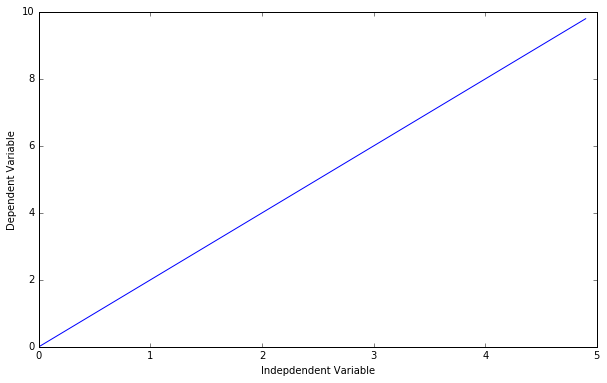

In [53]:
plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

In [54]:
x_data = np.random.rand(100).astype(np.float32) #vector

In [55]:
y_data = 3*x_data + 2

In [56]:
y_data = np.vectorize(lambda y:y + np.random.normal(loc = 0.0, scale = 0.1)) (y_data)

In [57]:
y_data

array([ 3.97881077,  2.29769614,  2.49385781,  4.74560475,  3.82016074,
        4.10725838,  3.45209748,  2.6118043 ,  4.23115272,  4.71001984,
        4.73816776,  2.8403409 ,  3.66448335,  2.4091588 ,  2.8513528 ,
        3.77273752,  4.16579656,  4.51460377,  4.89834449,  2.72738994,
        3.74546668,  4.56339104,  5.02959191,  3.25926856,  3.89986295,
        4.70089066,  4.04512611,  4.36364798,  2.83298275,  3.95607868,
        1.93658385,  4.61578646,  3.35855853,  4.41535249,  2.63343653,
        3.4269405 ,  4.42863071,  4.89557181,  4.61810069,  4.24746529,
        4.64936872,  3.88887884,  4.27777566,  3.15944755,  2.94788371,
        3.72109607,  2.89409133,  3.52240959,  4.88112134,  3.33839176,
        2.7458201 ,  3.19862282,  4.33306783,  2.29580426,  2.28118851,
        4.82170027,  4.76695774,  3.23878693,  4.17043266,  2.49126618,
        2.31081105,  2.89830946,  3.63954101,  4.74926042,  3.4023999 ,
        4.20056077,  4.90365729,  3.13554174,  3.74724449,  2.77

## cout pairs of x and y: 

In [58]:
zip(x_data, y_data)[0:5] 

[(0.65761304, 3.9788107717858781),
 (0.064148068, 2.2976961366325184),
 (0.21016234, 2.4938578064840091),
 (0.89150703, 4.7456047518847662),
 (0.57134503, 3.8201607441551482)]

## Building the linear regression using tensorflow:

In [59]:
a = tf.Variable(1.0)

In [60]:
b = tf.Variable(0.2)

In [61]:
y = a * x_data + b

In [62]:
loss = tf.reduce_mean(tf.square(y-y_data))

In [63]:
optimizer = tf.train.GradientDescentOptimizer(0.5)

In [64]:
train = optimizer.minimize(loss)

In [65]:
init = tf.initialize_all_variables()
session = tf.Session()
session.run(init)

In [66]:
train_date = []
for step in range(100):
    evals = session.run([train, a, b])[1:]
    if(step % 5 == 0):
        print(step, evals)
        train_date.append(evals)

(0, [2.7349775, 3.1045606])
(5, [2.5149295, 2.2954657])
(10, [2.6540132, 2.218055])
(15, [2.7566104, 2.1588371])
(20, [2.8329771, 2.1147656])
(25, [2.8898172, 2.0819628])
(30, [2.9321241, 2.0575473])
(35, [2.963613, 2.0393748])
(40, [2.9870505, 2.0258489])
(45, [3.0044954, 2.0157816])
(50, [3.0174799, 2.0082881])
(55, [3.0271442, 2.0027108])
(60, [3.0343373, 1.9985596])
(65, [3.0396912, 1.9954699])
(70, [3.0436761, 1.9931701])
(75, [3.0466421, 1.9914585])
(80, [3.0488498, 1.9901844])
(85, [3.0504932, 1.9892361])
(90, [3.0517163, 1.9885303])
(95, [3.0526264, 1.9880049])


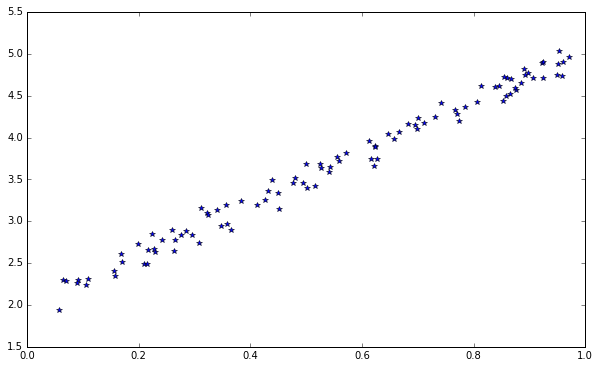

In [67]:
plt.plot(x_data, y_data, '*')

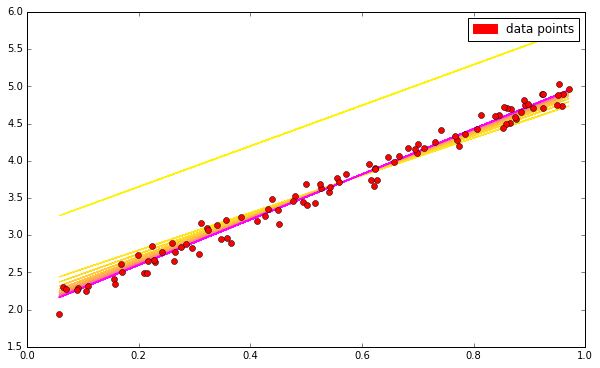

In [68]:
converter = plt.colors
cr, cg, cb = (1.0, 1.0, 0.0)

for f in train_date:
    cb += 1.0/len(train_date)
    cg -= 1.0/len(train_date)
    
    if cb > 1.0:
        cb = 1
    if cg < 0.0:
        cg = 0.0
    
    [a,b] = f
    f_y = np.vectorize(lambda x: a*x + b)(x_data)
    line = plt.plot(x_data, f_y)
    plt.setp(line, color = (cr, cg, cb))

plt.plot(x_data, y_data, 'ro')

green_line = mpatches.Patch(color = 'red', label = 'data points')

plt.legend(handles = [green_line])


## Logistic Regression:

In [198]:
iris = load_iris()

In [199]:
iris_x, iris_y = iris.data[:-1,:], iris.target[:-1]
iris_x, iris_y

(array([[ 5.1,  3.5,  1.4,  0.2],
        [ 4.9,  3. ,  1.4,  0.2],
        [ 4.7,  3.2,  1.3,  0.2],
        [ 4.6,  3.1,  1.5,  0.2],
        [ 5. ,  3.6,  1.4,  0.2],
        [ 5.4,  3.9,  1.7,  0.4],
        [ 4.6,  3.4,  1.4,  0.3],
        [ 5. ,  3.4,  1.5,  0.2],
        [ 4.4,  2.9,  1.4,  0.2],
        [ 4.9,  3.1,  1.5,  0.1],
        [ 5.4,  3.7,  1.5,  0.2],
        [ 4.8,  3.4,  1.6,  0.2],
        [ 4.8,  3. ,  1.4,  0.1],
        [ 4.3,  3. ,  1.1,  0.1],
        [ 5.8,  4. ,  1.2,  0.2],
        [ 5.7,  4.4,  1.5,  0.4],
        [ 5.4,  3.9,  1.3,  0.4],
        [ 5.1,  3.5,  1.4,  0.3],
        [ 5.7,  3.8,  1.7,  0.3],
        [ 5.1,  3.8,  1.5,  0.3],
        [ 5.4,  3.4,  1.7,  0.2],
        [ 5.1,  3.7,  1.5,  0.4],
        [ 4.6,  3.6,  1. ,  0.2],
        [ 5.1,  3.3,  1.7,  0.5],
        [ 4.8,  3.4,  1.9,  0.2],
        [ 5. ,  3. ,  1.6,  0.2],
        [ 5. ,  3.4,  1.6,  0.4],
        [ 5.2,  3.5,  1.5,  0.2],
        [ 5.2,  3.4,  1.4,  0.2],
        [ 4.7,

In [200]:
iris_y = pd.get_dummies(iris_y).values

In [201]:
train_x, test_x, train_y, test_y = train_test_split(iris_x, iris_y, test_size = 0.33, random_state = 42)

In [202]:
train_x

array([[ 5.7,  3. ,  4.2,  1.2],
       [ 6.5,  3. ,  5.8,  2.2],
       [ 5.6,  3. ,  4.5,  1.5],
       [ 5.1,  3.5,  1.4,  0.2],
       [ 6.9,  3.1,  5.1,  2.3],
       [ 5.8,  2.7,  4.1,  1. ],
       [ 5.2,  3.4,  1.4,  0.2],
       [ 5. ,  3.5,  1.3,  0.3],
       [ 5.1,  3.8,  1.9,  0.4],
       [ 5. ,  2. ,  3.5,  1. ],
       [ 7.7,  2.8,  6.7,  2. ],
       [ 4.8,  3.4,  1.9,  0.2],
       [ 5. ,  3. ,  1.6,  0.2],
       [ 5.1,  3.3,  1.7,  0.5],
       [ 5. ,  2.3,  3.3,  1. ],
       [ 5.1,  3.4,  1.5,  0.2],
       [ 5.6,  2.7,  4.2,  1.3],
       [ 6. ,  3. ,  4.8,  1.8],
       [ 4.6,  3.2,  1.4,  0.2],
       [ 5.7,  2.9,  4.2,  1.3],
       [ 6.8,  3. ,  5.5,  2.1],
       [ 5.5,  4.2,  1.4,  0.2],
       [ 5.1,  2.5,  3. ,  1.1],
       [ 6.7,  3. ,  5.2,  2.3],
       [ 6. ,  2.2,  4. ,  1. ],
       [ 5.4,  3. ,  4.5,  1.5],
       [ 6. ,  2.2,  5. ,  1.5],
       [ 5.5,  2.3,  4. ,  1.3],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 6.5,  3. ,  5.2,  2. ],
       [ 6

In [203]:
num_features = train_x.shape[1]
num_features

4

In [204]:
num_labels = train_y.shape[1]
num_labels

3

In [205]:
X = tf.placeholder(tf.float32, [None, num_features])
Y = tf.placeholder(tf.float32, [None, num_labels])

In [206]:
W = tf.Variable(tf.zeros([4,3]))
b = tf.Variable(tf.zeros([3]))

In [207]:
# random sampling for the weights 
weights = tf.Variable(tf.random_normal([num_features, num_labels], mean = 0, stddev = 0.01, name = 'weights'))
bias = tf.Variable(tf.random_normal([1, num_labels], mean = 0, stddev = 0.01, name = 'bias'))

## The model:
y_predict = sigmoid(W*X + b)

In [208]:
apply_weights_op = tf.matmul(X, weights, name = "apply_weights")
add_bias = tf.add(apply_weights_op, bias, name = "apply_bias")
activation_operation = tf.sigmoid(add_bias, name = "activation")

In [209]:
num_epoch = 7000
learning_rate = tf.train.exponential_decay(learning_rate= 0.0008, global_step=1, decay_rate=0.95, decay_steps=train_x.shape[0], staircase = True)

In [210]:
cost = tf.nn.l2_loss(activation_operation - Y, name = "Sqr_error_cost")
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [211]:
sess = tf.Session()
init = tf.initialize_all_variables()
sess.run(init)

In [212]:
correct_prediction = tf.equal(tf.arg_max(activation_operation, 1), tf.arg_max(Y, 1)) # to return the label with the highest probability
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

In [213]:
activation_summary = tf.histogram_summary("output", activation_operation)

# Summary op for accuracy
accuracy_summary = tf.scalar_summary("accuracy", accuracy)

# Summary op for cost
cost_summary = tf.scalar_summary("cost", cost)

# Summary ops to check how variables (W, b) are updating after each iteration
weightSummary = tf.histogram_summary("weights", weights.eval(session=sess))
biasSummary = tf.histogram_summary("biases", bias.eval(session=sess))

# Merge all summaries
merged = tf.merge_summary([activation_summary, accuracy_summary, cost_summary, weightSummary, biasSummary])

# Summary writer
writer = tf.train.SummaryWriter("summary_logs", sess.graph_def)

## Run the model

In [214]:
# Initialize reporting variables
cost = 0
diff = 1
epoch_values = []
accuracy_values = []
cost_values = []

# Training epochs
for i in range(num_epoch):
    if i > 1 and diff < .0001:
        print("change in cost %g; convergence."%diff)
        break
    else:
        # Run training step
        step = sess.run(train_op, feed_dict={X: train_x, Y: train_y})
        # Report occasional stats
        if i % 10 == 0:
            # Add epoch to epoch_values
            epoch_values.append(i)
            # Generate accuracy stats on test data
            train_accuracy, newCost = sess.run([accuracy, tf.cast(cost, "float")], feed_dict={X: train_x, Y: train_y})
            # Add accuracy to live graphing variable
            accuracy_values.append(train_accuracy)
            # Add cost to live graphing variable
            cost_values.append(newCost)
            # Re-assign values for variables
            diff = abs(newCost - cost)
            cost = newCost

            #generate print statements
            print("step %d, training accuracy %g, cost %g, change in cost %g"%(i, train_accuracy, newCost, diff))


# How well do we perform on held-out test data?
print("final accuracy on test set: %s" %str(sess.run(accuracy, 
                                                     feed_dict={X: test_x, 
                                                                Y: test_y})))

step 0, training accuracy 0.333333, cost 0, change in cost 0
change in cost 0; convergence.
final accuracy on test set: 0.32


In [215]:
cost_values

[0.0]